In [ ]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

warnings.filterwarnings('ignore')

In [2]:
possum_data = pd.read_csv('../b. Datasets/Possum Morphometric Analysis/Possum Morphometric Analysis.csv')

In [3]:
display(possum_data.head(2))
display(possum_data.tail(2))

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [4]:
possum_data.shape

(104, 14)

In [5]:
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
numerical_possum_data = possum_data.select_dtypes(include='number')
categorical_possum_data = possum_data.select_dtypes(include='object')

print("Numerical features:", numerical_possum_data.columns)
print("Categorical features:", categorical_possum_data.columns)

Numerical features: Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')
Categorical features: Index(['Pop', 'sex'], dtype='object')


In [7]:
possum_data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [8]:
possum_data.isna().sum() / possum_data.shape[1] * 100

case         0.000000
site         0.000000
Pop          0.000000
sex          0.000000
age         14.285714
hdlngth      0.000000
skullw       0.000000
totlngth     0.000000
taill        0.000000
footlgth     7.142857
earconch     0.000000
eye          0.000000
chest        0.000000
belly        0.000000
dtype: float64

In [9]:
numerical_possum_data.skew()

case        0.000000
site        0.187788
age         0.539160
hdlngth    -0.055974
skullw      1.007540
totlngth   -0.285266
taill       0.167869
footlgth    0.092043
earconch    0.154808
eye         0.392741
chest      -0.055511
belly       0.073975
dtype: float64

In [10]:
possum_data.dropna(inplace=True)
possum_data.reset_index(inplace=True)

In [11]:
possum_data.isna().sum().sum()

0

In [12]:
numerical_possum_data.std()

case        30.166206
site         2.349086
age          1.909244
hdlngth      3.573349
skullw       3.113426
totlngth     4.310549
taill        1.959518
footlgth     4.395306
earconch     4.109380
eye          1.050374
chest        2.045597
belly        2.761949
dtype: float64

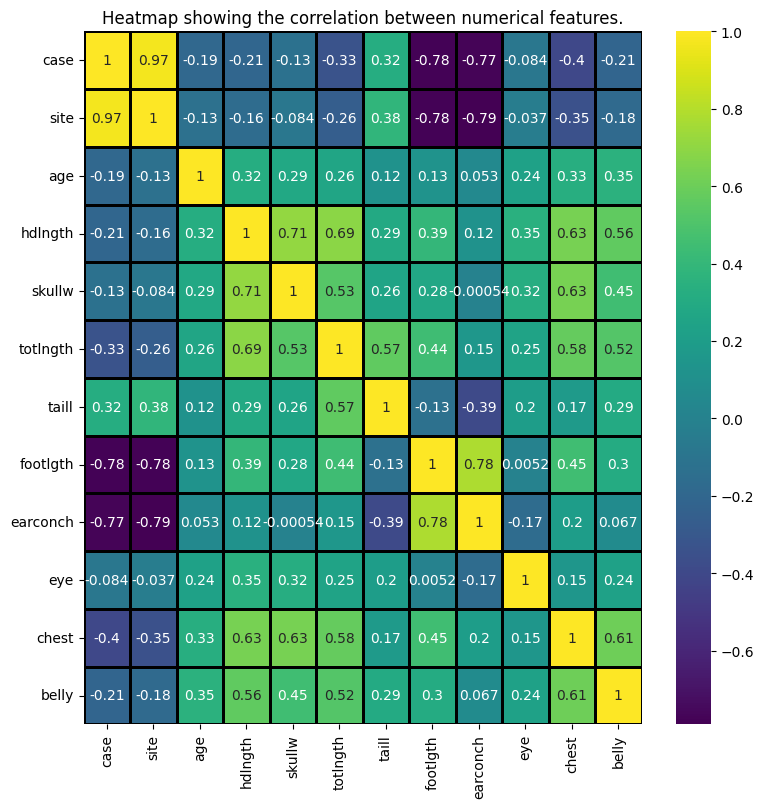

In [13]:
plt.figure(figsize=(9, 9))
sns.heatmap(data=numerical_possum_data.corr(), annot=True, linewidths=0.8, linecolor='black', cmap='viridis')
plt.title("Heatmap showing the correlation between numerical features.")
plt.show()

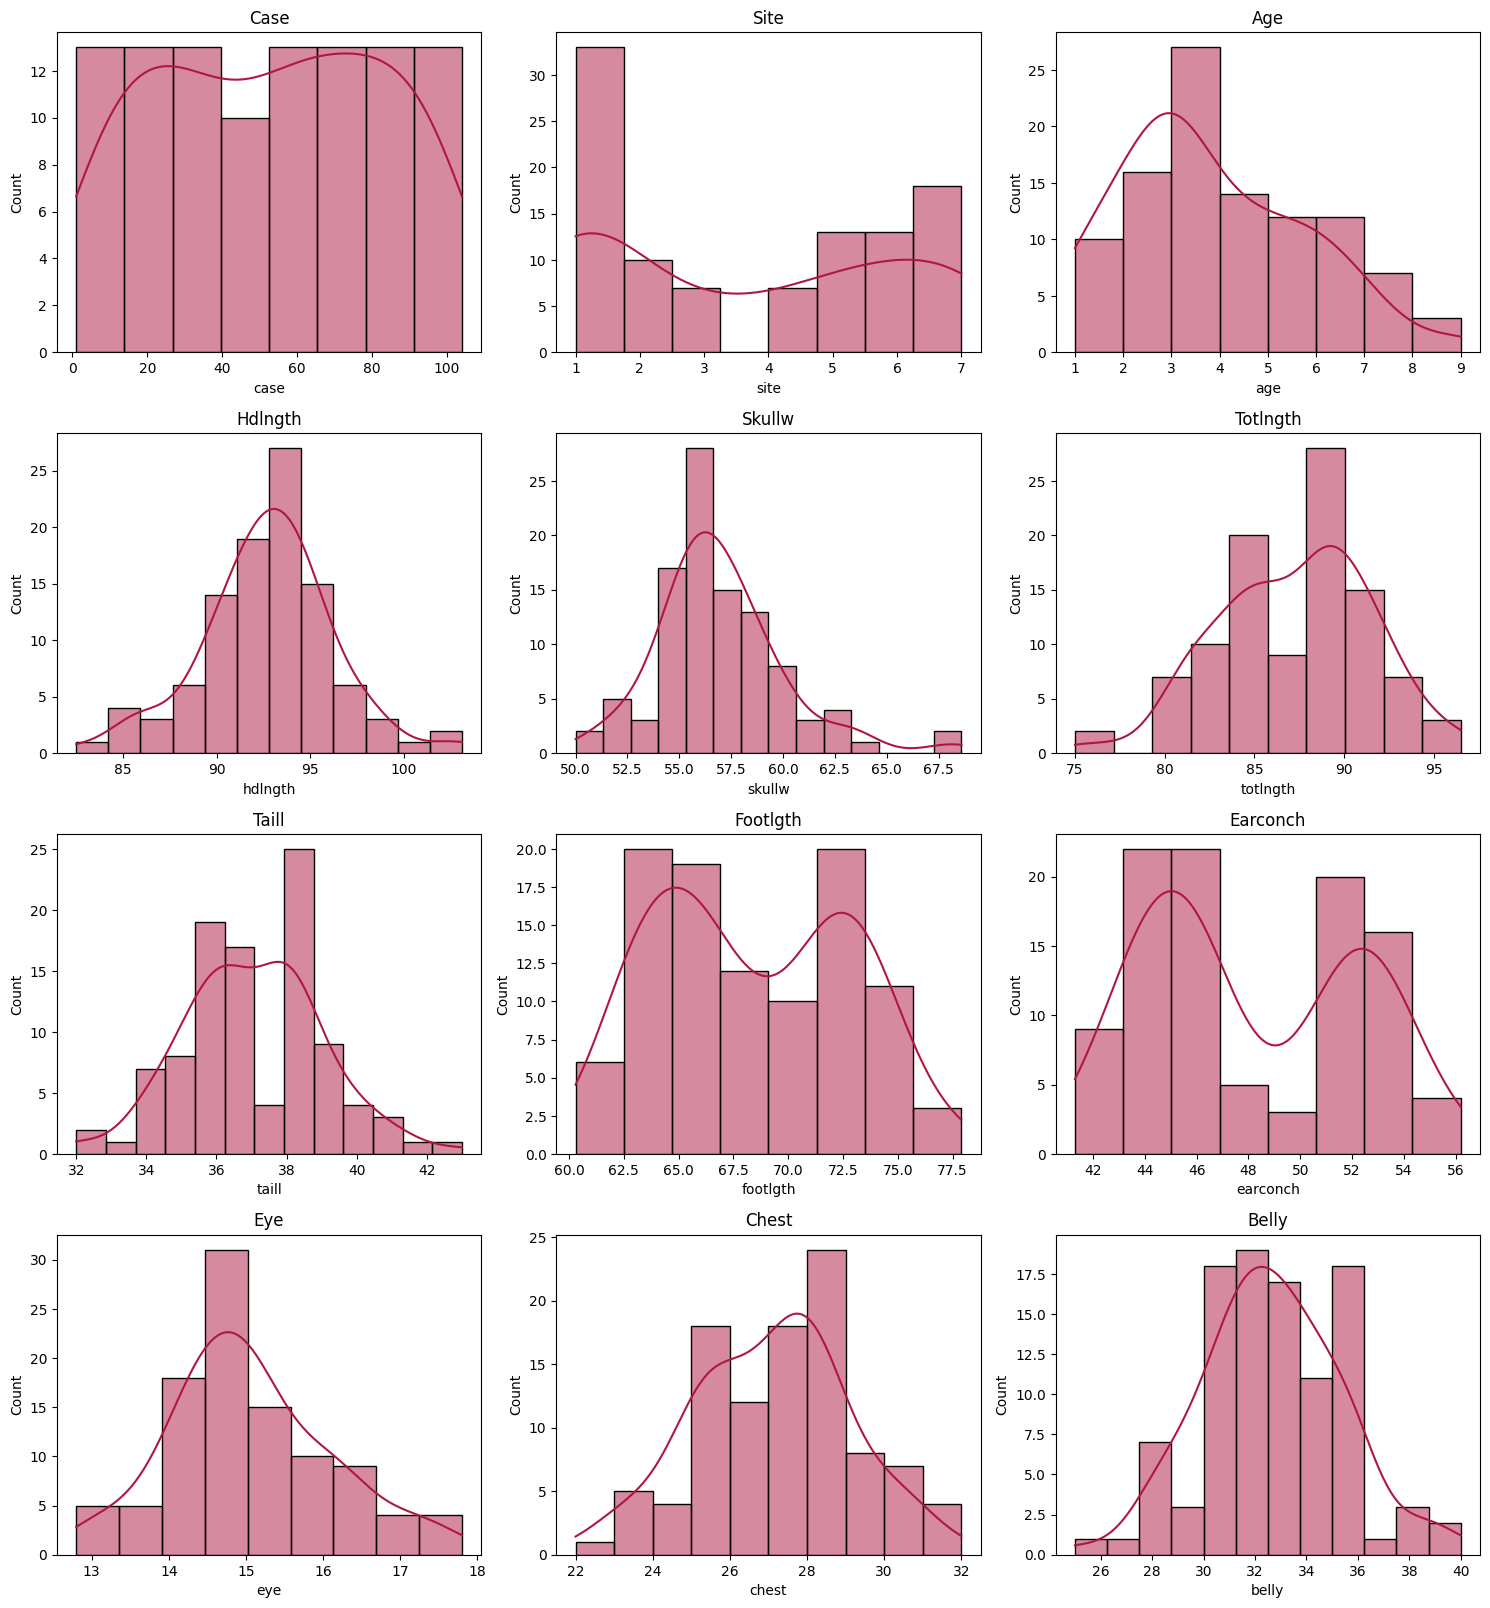

In [14]:
num_cols = 3
num_rows = (len(numerical_possum_data) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*4))
axes = axes.flatten()

for index, feature in enumerate(numerical_possum_data.columns):
    sns.histplot(data=possum_data, x=feature, color='#AF1740', kde=True, ax=axes[index])
    axes[index].set_title(feature.title())

for j in range(index + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

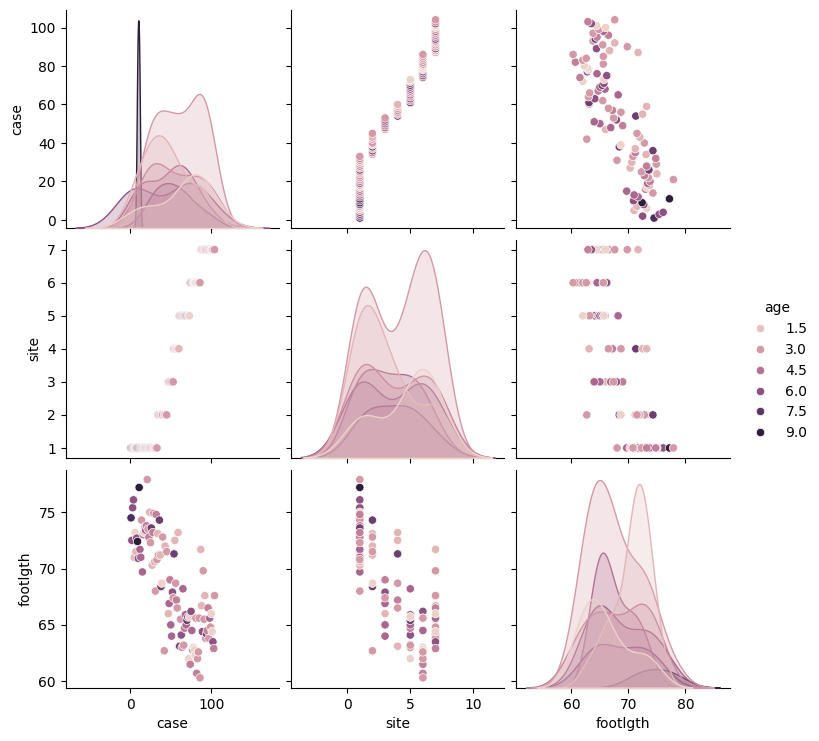

In [ ]:
sns.pairplot(data=possum_data[['case', 'site', 'footlgth', 'age']], 
             hue='age')

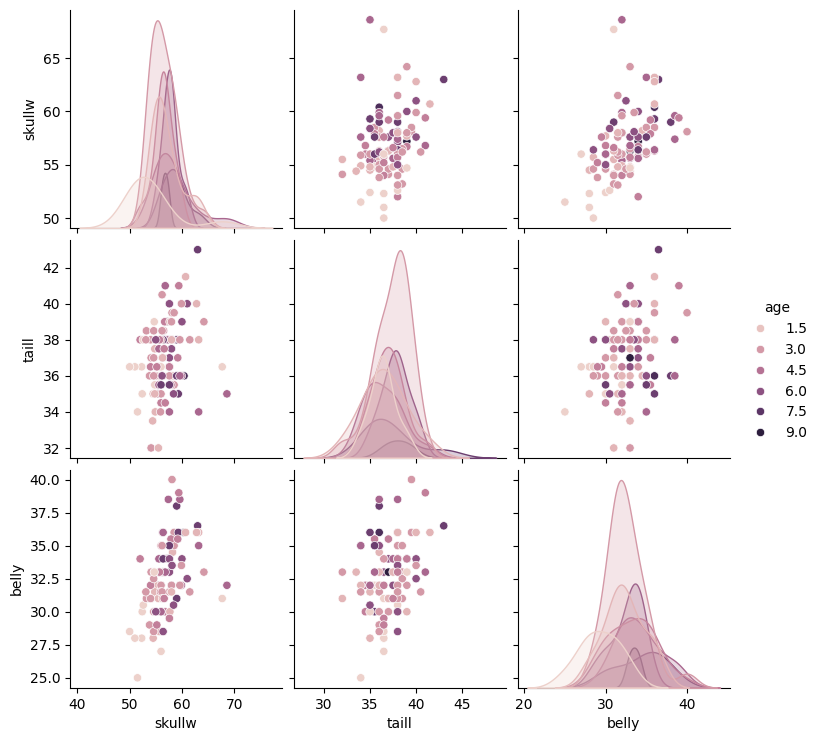

In [ ]:
sns.pairplot(data=possum_data[['skullw', 'taill', 'belly', 'age']], 
             hue='age')

In [17]:
label_encoder = LabelEncoder()
for feature in possum_data.select_dtypes(include='object'):
    possum_data[feature] = label_encoder.fit_transform(possum_data[feature])

possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     101 non-null    int64  
 1   case      101 non-null    int64  
 2   site      101 non-null    int64  
 3   Pop       101 non-null    int32  
 4   sex       101 non-null    int32  
 5   age       101 non-null    float64
 6   hdlngth   101 non-null    float64
 7   skullw    101 non-null    float64
 8   totlngth  101 non-null    float64
 9   taill     101 non-null    float64
 10  footlgth  101 non-null    float64
 11  earconch  101 non-null    float64
 12  eye       101 non-null    float64
 13  chest     101 non-null    float64
 14  belly     101 non-null    float64
dtypes: float64(10), int32(2), int64(3)
memory usage: 11.2 KB


In [18]:
possum_data.skew()

index      -0.025406
case       -0.025406
site        0.136681
Pop        -0.304908
sex        -0.346676
age         0.555764
hdlngth    -0.054936
skullw      1.032011
totlngth   -0.248856
taill       0.123453
footlgth    0.124763
earconch    0.218385
eye         0.382085
chest      -0.058406
belly       0.105845
dtype: float64

In [19]:
for feature in ['age', 'skullw']:
    upper_bound = possum_data[feature].quantile(0.94)
    lower_bound = possum_data[feature].quantile(0.06)
    
    possum_data[feature].clip(lower=lower_bound, upper=upper_bound, inplace=True)

In [20]:
possum_data.skew()

index      -0.025406
case       -0.025406
site        0.136681
Pop        -0.304908
sex        -0.346676
age         0.306674
hdlngth    -0.054936
skullw      0.562719
totlngth   -0.248856
taill       0.123453
footlgth    0.124763
earconch    0.218385
eye         0.382085
chest      -0.058406
belly       0.105845
dtype: float64

### Regression 1: Age Prediction

In [21]:
X_regression_age = possum_data.drop(labels='age', axis=1)
y_regression_age = possum_data['age']

In [22]:
display(X_regression_age.head(2))
display(y_regression_age.head(2))

,index,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,1,1,0,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,2,1,0,0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


0    7.0
1    6.0
Name: age, dtype: float64

In [23]:
min_max_scaler = MinMaxScaler()
feature_names_reg_age = X_regression_age.columns
X_regression_age = min_max_scaler.fit_transform(X_regression_age)
X_regression_age = pd.DataFrame(data=X_regression_age, columns=feature_names_reg_age)

In [24]:
display(X_regression_age.head(2))
display(y_regression_age.head(2))

,index,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0.000000,0.000000,0.0,0.0,1.0,0.563107,0.764706,0.651163,0.363636,0.806818,0.885906,0.48,0.60,0.733333
1,0.009709,0.009709,0.0,0.0,0.0,0.485437,0.490196,0.767442,0.409091,0.693182,0.664430,0.64,0.65,0.533333


0    7.0
1    6.0
Name: age, dtype: float64

In [25]:
X_train_reg_age, X_test_reg_age, y_train_reg_age, y_test_reg_age = train_test_split(X_regression_age, 
                                                                                    y_regression_age, 
                                                                                    test_size=0.2, 
                                                                                    shuffle=True, 
                                                                                    random_state=0)

In [26]:
display(X_train_reg_age.head(2))
display(X_test_reg_age.head(2))
display(y_train_reg_age.head(2))
display(y_test_reg_age.head(2))

,index,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
62,0.631068,0.631068,0.666667,1.0,0.0,0.383495,0.313725,0.511628,0.409091,0.164773,0.194631,0.58,0.45,0.6
3,0.029126,0.029126,0.000000,0.0,0.0,0.519417,0.441176,0.790698,0.545455,0.897727,0.731544,0.48,0.60,0.6


,index,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
26,0.252427,0.252427,0.0,0.0,0.0,0.388350,0.186275,0.465116,0.272727,0.568182,0.637584,0.28,0.10,0.2
86,0.864078,0.864078,1.0,1.0,1.0,0.490291,0.196078,0.465116,0.590909,0.539773,0.234899,0.34,0.35,0.5


62    3.0
3     6.0
Name: age, dtype: float64

26    2.0
86    3.0
Name: age, dtype: float64

In [27]:
param_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': range(1, 7, 1),
    'max_features': ['sqrt', 'log2', None, 8, 10, 12, 13, 14],
    'n_estimators': range(100, 600, 100),
    'min_samples_split': [2, 5, 10, 15], 
    'min_samples_leaf': [1, 2, 5, 10]
}

random_forest_regressor = RandomForestRegressor()

random_search_cv = RandomizedSearchCV(estimator=random_forest_regressor, 
                                      param_distributions=param_grid,
                                      n_iter=10, 
                                      cv=5, 
                                      scoring='neg_root_mean_squared_error', 
                                      random_state=0)

random_search_cv.fit(X_train_reg_age, y_train_reg_age)

best_parameters = random_search_cv.best_params_
print('Best parameters:', best_parameters)

Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 13, 'max_depth': 1, 'criterion': 'friedman_mse'}


In [28]:
rfr_reg_age = random_search_cv.best_estimator_
y_pred_test_reg_age_pred = rfr_reg_age.predict(X_test_reg_age)

age_reg_test_rmse = mean_squared_error(y_test_reg_age, y_pred_test_reg_age_pred, squared=False)
print(f"Test RMSE: {age_reg_test_rmse}")

age_reg_test_mape = mean_absolute_percentage_error(y_test_reg_age, y_pred_test_reg_age_pred) * 100
print(f"Test MAPE: {age_reg_test_mape}")

Test RMSE: 1.580151844452856
Test MAPE: 62.52761230975403


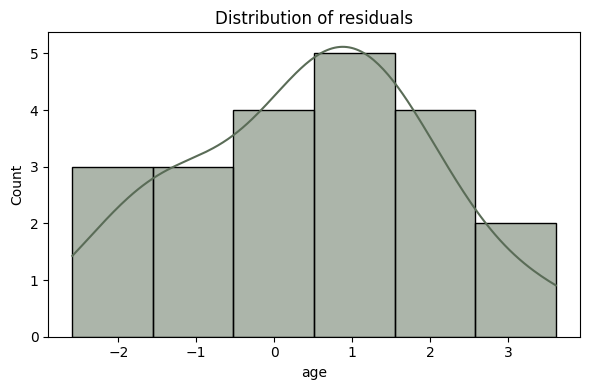

In [29]:
residuals = y_pred_test_reg_age_pred - y_test_reg_age
plt.figure(figsize=(6, 4))
sns.histplot(data=residuals, kde=True, color='#5A6C57')
plt.title('Distribution of residuals')
plt.tight_layout()
plt.show()

In [30]:
residuals.skew()

-0.07566659010330787

<Figure size 500x300 with 0 Axes>

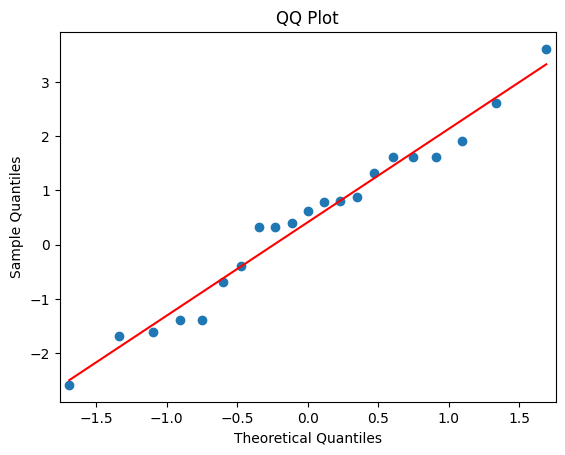

In [31]:
plt.figure(figsize=(5, 3))
sm.qqplot(data=residuals, line='r')
plt.title("QQ Plot")
plt.show()

In [32]:
submission_dataframe = pd.DataFrame({
    'Index': X_test_reg_age.index,
    'age': y_pred_test_reg_age_pred
})
submission_dataframe.sort_values(by='Index', inplace=True)

In [33]:
submission_dataframe_file = '../d. Output Files/PossumMorphometricAnalysis/PossumMorphometricAnalysis_Age_Prediction.csv'
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: PossumMorphometricAnalysis_Age_Prediction.csv


### Regression 2: Head Length Prediction

In [34]:
X_regression_hdlngth = possum_data.drop(labels='hdlngth', axis=1)
y_regression_hdlngth = possum_data['hdlngth']

In [35]:
X_train_reg_hl, X_test_reg_hl, y_train_reg_hl, y_test_reg_hl = train_test_split(X_regression_hdlngth, 
                                                                                y_regression_hdlngth, 
                                                                                test_size=0.2, 
                                                                                shuffle=True, 
                                                                                random_state=0)

In [36]:
display(X_train_reg_hl.head(2))
display(X_test_reg_hl.head(2))
display(y_train_reg_hl.head(2))
display(y_test_reg_hl.head(2))

,index,case,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
62,65,66,5,1,0,3.0,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0
3,3,4,1,0,0,6.0,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0


,index,case,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
26,26,27,1,0,0,2.0,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
86,89,90,7,1,1,3.0,54.6,85.0,38.5,69.8,44.8,14.5,25.5,32.5


62    90.4
3     93.2
Name: hdlngth, dtype: float64

26    90.5
86    92.6
Name: hdlngth, dtype: float64

In [37]:
param_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': range(1, 7, 1),
    'max_features': ['sqrt', 'log2', None, 8, 10, 12, 13, 14],
    'n_estimators': range(100, 600, 100),
    'min_samples_split': [2, 5, 10, 15], 
    'min_samples_leaf': [1, 2, 5, 10]
}

random_forest_regressor = RandomForestRegressor()

random_search_cv = RandomizedSearchCV(estimator=random_forest_regressor, 
                                      param_distributions=param_grid,
                                      n_iter=10, 
                                      cv=5, 
                                      scoring='neg_root_mean_squared_error', 
                                      random_state=0)

random_search_cv.fit(X_train_reg_hl, y_train_reg_hl)

best_parameters = random_search_cv.best_params_
print('Best parameters:', best_parameters)

Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 3, 'criterion': 'poisson'}


In [38]:
rfr_reg_hl = random_search_cv.best_estimator_
y_pred_test_reg_hl_pred = rfr_reg_hl.predict(X_test_reg_hl)

hl_reg_test_rmse = mean_squared_error(y_test_reg_hl, y_pred_test_reg_hl_pred, squared=False)
print(f"Test RMSE: {hl_reg_test_rmse}")

hl_reg_test_mape = mean_absolute_percentage_error(y_test_reg_hl, y_pred_test_reg_hl_pred) * 100
print(f"Test MAPE: {hl_reg_test_mape}")

Test RMSE: 2.0516651934104733
Test MAPE: 1.882696725344681


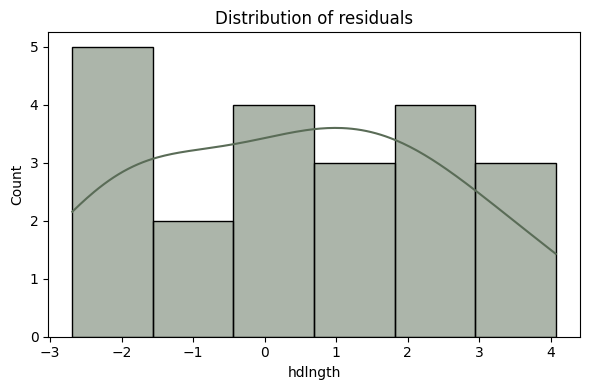

In [39]:
residuals = y_pred_test_reg_hl_pred - y_test_reg_hl
plt.figure(figsize=(6, 4))
sns.histplot(data=residuals, kde=True, color='#5A6C57')
plt.title('Distribution of residuals')
plt.tight_layout()
plt.show()

In [40]:
residuals.skew()

0.07727168904044174

<Figure size 500x300 with 0 Axes>

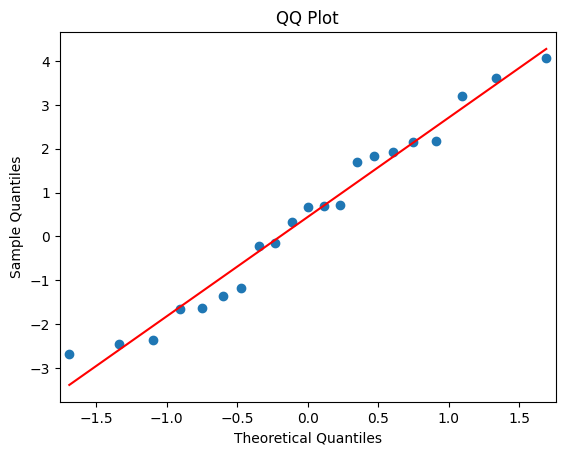

In [41]:
plt.figure(figsize=(5, 3))
sm.qqplot(data=residuals, line='r')
plt.title("QQ Plot")
plt.show()

In [42]:
submission_dataframe = pd.DataFrame({
    'Index': X_test_reg_hl.index,
    'Head Length': y_pred_test_reg_hl_pred
})
submission_dataframe.sort_values(by='Index', inplace=True)

In [43]:
submission_dataframe_file = '../d. Output Files/PossumMorphometricAnalysis/PossumMorphometricAnalysis_HL_Prediction.csv'
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: PossumMorphometricAnalysis_HL_Prediction.csv


### Classification 1: Sex Prediction

In [44]:
X_classification_sex = possum_data.drop(labels='sex', axis=1)
y_classification_sex = possum_data['sex']

In [45]:
smote_obj = SMOTE(random_state=0)
X_classification_sex, y_classification_sex = smote_obj.fit_resample(X_classification_sex, y_classification_sex)

In [46]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification_sex, 
                                                                                                                y_classification_sex, 
                                                                                                                test_size=0.2, 
                                                                                                                shuffle=True, 
                                                                                                                random_state=0)

In [47]:
display(X_train_classification.head(2))
display(X_test_classification.head(2))
display(y_train_classification.head(2))
display(y_test_classification.head(2))

,index,case,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
109,6,7,1,0,5.350061,94.579021,57.236034,90.935006,36.805018,72.764994,53.861004,14.461004,29.129988,33.740024
13,13,14,1,0,3.000000,95.400000,57.600000,91.500000,36.000000,74.300000,53.700000,15.100000,28.000000,31.500000


,index,case,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
86,89,90,7,1,3.0,92.6,54.6,85.0,38.5,69.8,44.8,14.5,25.5,32.5
85,88,89,7,1,6.0,97.7,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5


109    0
13     1
Name: sex, dtype: int32

86    1
85    1
Name: sex, dtype: int32

In [48]:
param_grid = {
    'criterion': ['log_loss', 'gini', 'entropy'],
    'max_depth': range(1, 7, 1),
    'max_features': ['sqrt', 'log2', None, 8, 10, 12, 13, 14],
    'n_estimators': range(100, 600, 100),
    'min_samples_split': [2, 5, 10, 15], 
    'min_samples_leaf': [1, 2, 5, 10]
}

random_forest_classifier = RandomForestClassifier()

stratified_k_fold_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=0)

random_search_cv = RandomizedSearchCV(estimator=random_forest_classifier, 
                                      param_distributions=param_grid,
                                      n_iter=15, 
                                      cv=stratified_k_fold_cv, 
                                      scoring='f1', 
                                      random_state=0)

random_search_cv.fit(X_train_classification, y_train_classification)
best_parameters = random_search_cv.best_params_
print('Best parameters:', best_parameters)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy'}


In [49]:
rfc_model = random_search_cv.best_estimator_
y_test_pred_classification = rfc_model.predict(X_test_classification)

In [50]:
print("Accuracy is ", round(accuracy_score(y_test_classification, y_test_pred_classification)*100, 2))

Accuracy is  75.0


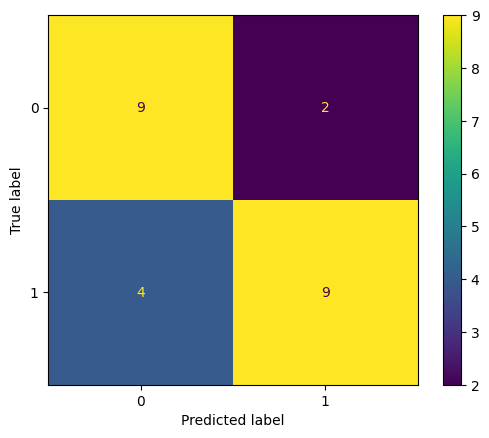

In [51]:
confusion_matrix_output = confusion_matrix(y_test_classification, y_test_pred_classification)
ConfusionMatrixDisplay(confusion_matrix_output).plot()

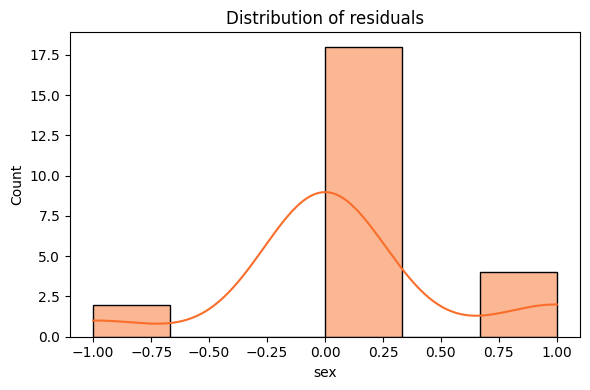

In [52]:
residuals = y_test_classification - y_test_pred_classification
plt.figure(figsize=(6, 4))
sns.histplot(data=residuals, kde=True, color='#F96E2A')
plt.title('Distribution of residuals')
plt.tight_layout()
plt.show()

In [ ]:
submission_dataframe = pd.DataFrame({
    'Index': X_test_classification.index,
    'Sex': y_test_pred_classification
})
submission_dataframe.sort_values(by='Index', inplace=True)

In [54]:
submission_dataframe_file = '../d. Output Files/PossumMorphometricAnalysis/PossumMorphometricAnalysis_Sex_Prediction.csv'
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: PossumMorphometricAnalysis_Sex_Prediction.csv
